<a href="https://colab.research.google.com/github/ashutosh-linux/STML/blob/main/ASSIGNMENT_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"Assignment 3, question 1"
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/housing.csv')

columns = ['latitude','total_rooms','housing_median_age','total_bedrooms']
mle_results = {}

for column in columns:
    data = df[column].dropna()
    mean_mle = np.mean(data)
    variance_mle = np.var(data)
    mle_results[column] = {'mean': mean_mle, 'variance': variance_mle}

for column, estimates in mle_results.items():
    print(f"{column} - Mean: {estimates['mean']}, Variance: {estimates['variance']}")


latitude - Mean: 35.63186143410853, Variance: 4.562071602892517
total_rooms - Mean: 2635.7630813953488, Variance: 4759214.512668024
housing_median_age - Mean: 28.639486434108527, Variance: 158.38858617035862
total_bedrooms - Mean: 537.8705525375618, Variance: 177556.6871536956


To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter". To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

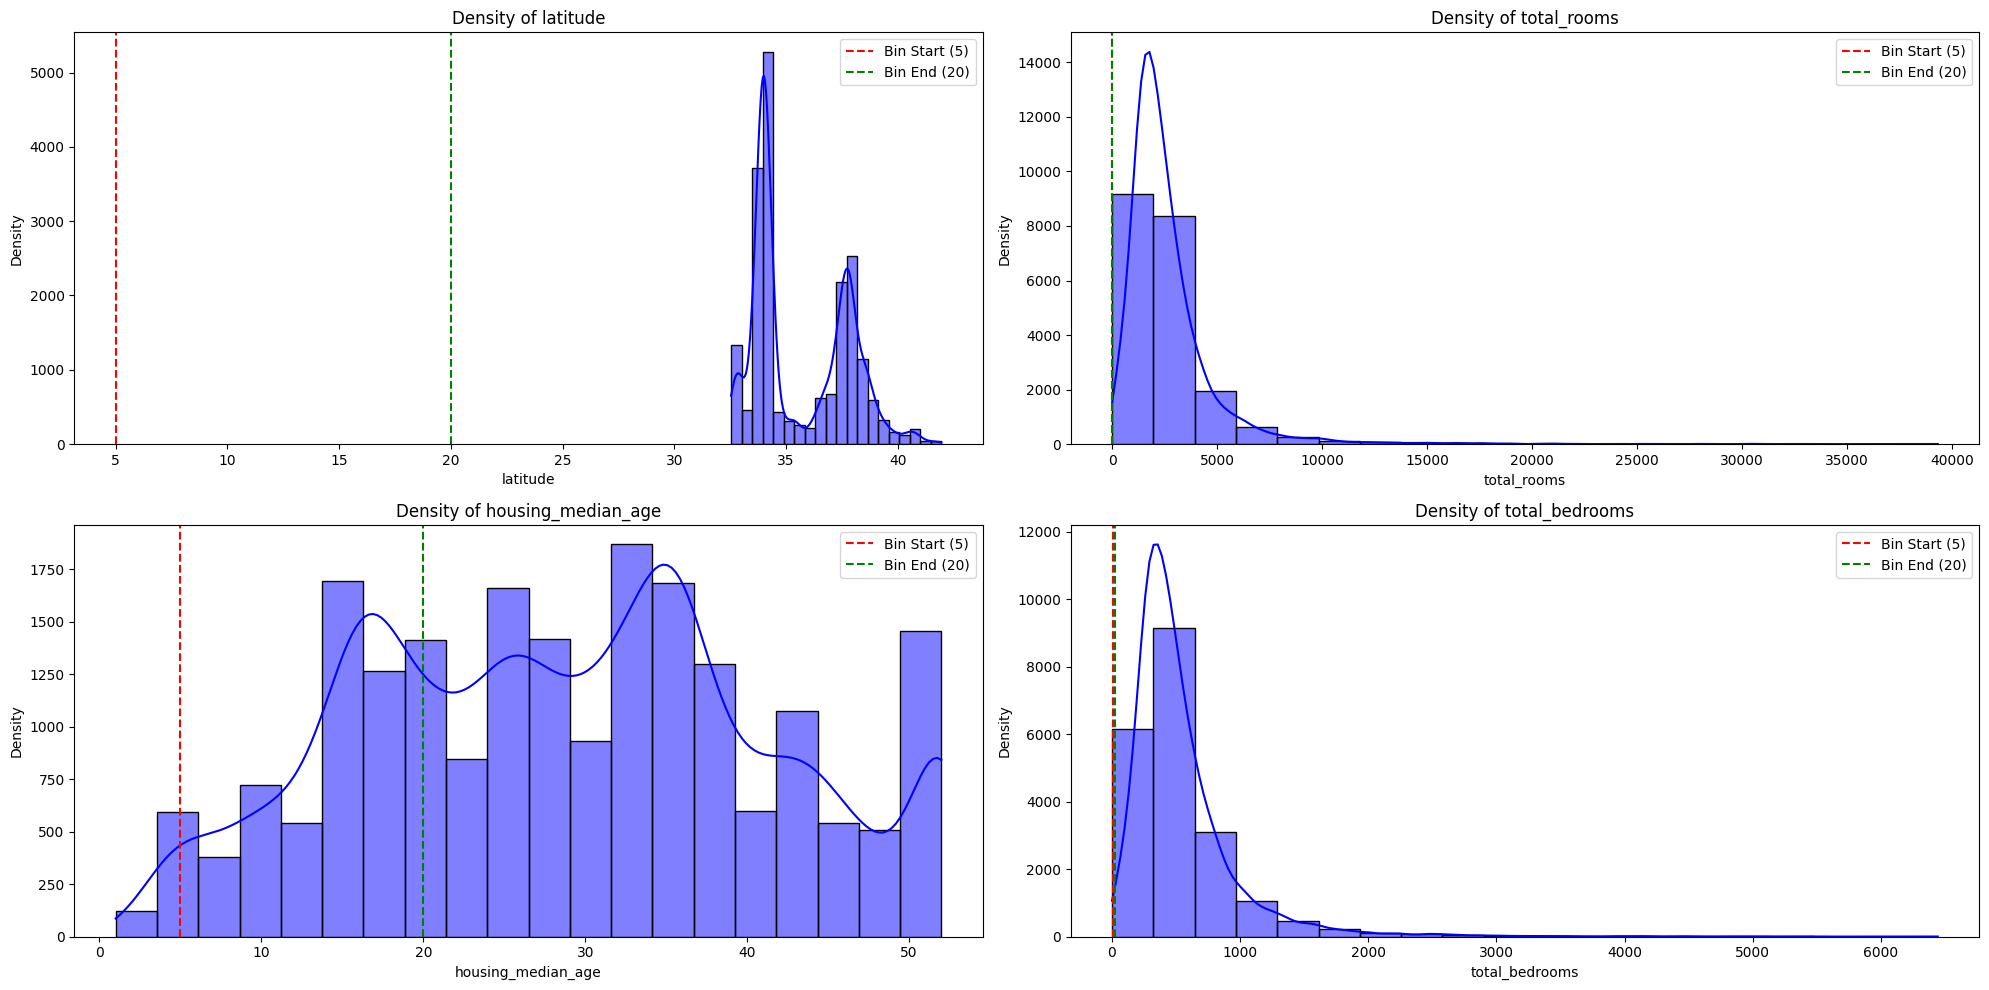

In [ ]:
"Assignment 3, question 3"
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

file_path = '/content/drive/MyDrive/housing.csv'
housing_data = pd.read_csv(file_path)

columns_to_analyze = ['latitude', 'total_rooms', 'housing_median_age', 'total_bedrooms']
bin_edges = [5, 10, 15, 20]

plt.figure(figsize=(20, 10))

for i, column in enumerate(columns_to_analyze, 1):
    plt.subplot(2, 2, i)
    sns.histplot(housing_data[column].dropna(), bins=20, kde=True, color='blue')
    plt.title(f'Density of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.axvline(bin_edges[0], color='red', linestyle='--', label=f'Bin Start ({bin_edges[0]})')
    plt.axvline(bin_edges[-1], color='green', linestyle='--', label=f'Bin End ({bin_edges[-1]})')
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
"Assignment 3, question 2"
import pandas as pd
import numpy as np
from scipy.optimize import minimize

url = '/content/drive/MyDrive/housing.csv'
df = pd.read_csv(url)

latitude = df['latitude'].dropna()

def log_likelihood(params, data):
    mu, sigma2 = params
    n = len(data)
    if sigma2 <= 0:
        return np.inf
    term1 = -n / 2 * np.log(2 * np.pi)
    term2 = -n / 2 * np.log(sigma2)
    term3 = -1 / (2 * sigma2) * np.sum((data - mu) ** 2)
    return - (term1 + term2 + term3)

initial_guess = [latitude.mean(), latitude.var()]
result = minimize(log_likelihood, initial_guess, args=(latitude,), method='L-BFGS-B', bounds=[(None, None), (1e-10, None)])

mu_hat, sigma2_hat = result.x

def calculate_log_likelihood(mu, sigma2, data):
    n = len(data)
    if sigma2 <= 0:
        return np.inf
    term1 = -n / 2 * np.log(2 * np.pi)
    term2 = -n / 2 * np.log(sigma2)
    term3 = -1 / (2 * sigma2) * np.sum((data - mu) ** 2)
    return -(term1 + term2 + term3)

sigma2_values = [50, 75, 80]
log_likelihood_values = [calculate_log_likelihood(mu_hat, sigma2, latitude) for sigma2 in sigma2_values]

print(f"Estimated mu: {mu_hat}")
print(f"Estimated sigma^2: {sigma2_hat}")
print(f"Log-likelihood values for sigma^2 = 50, 75, 80: {log_likelihood_values}")



Estimated mu: 35.63186143410853
Estimated sigma^2: 4.562075895796675
Log-likelihood values for sigma^2 = 50, 75, 80: [60280.58032019993, 64151.10970959717, 64777.91343195204]


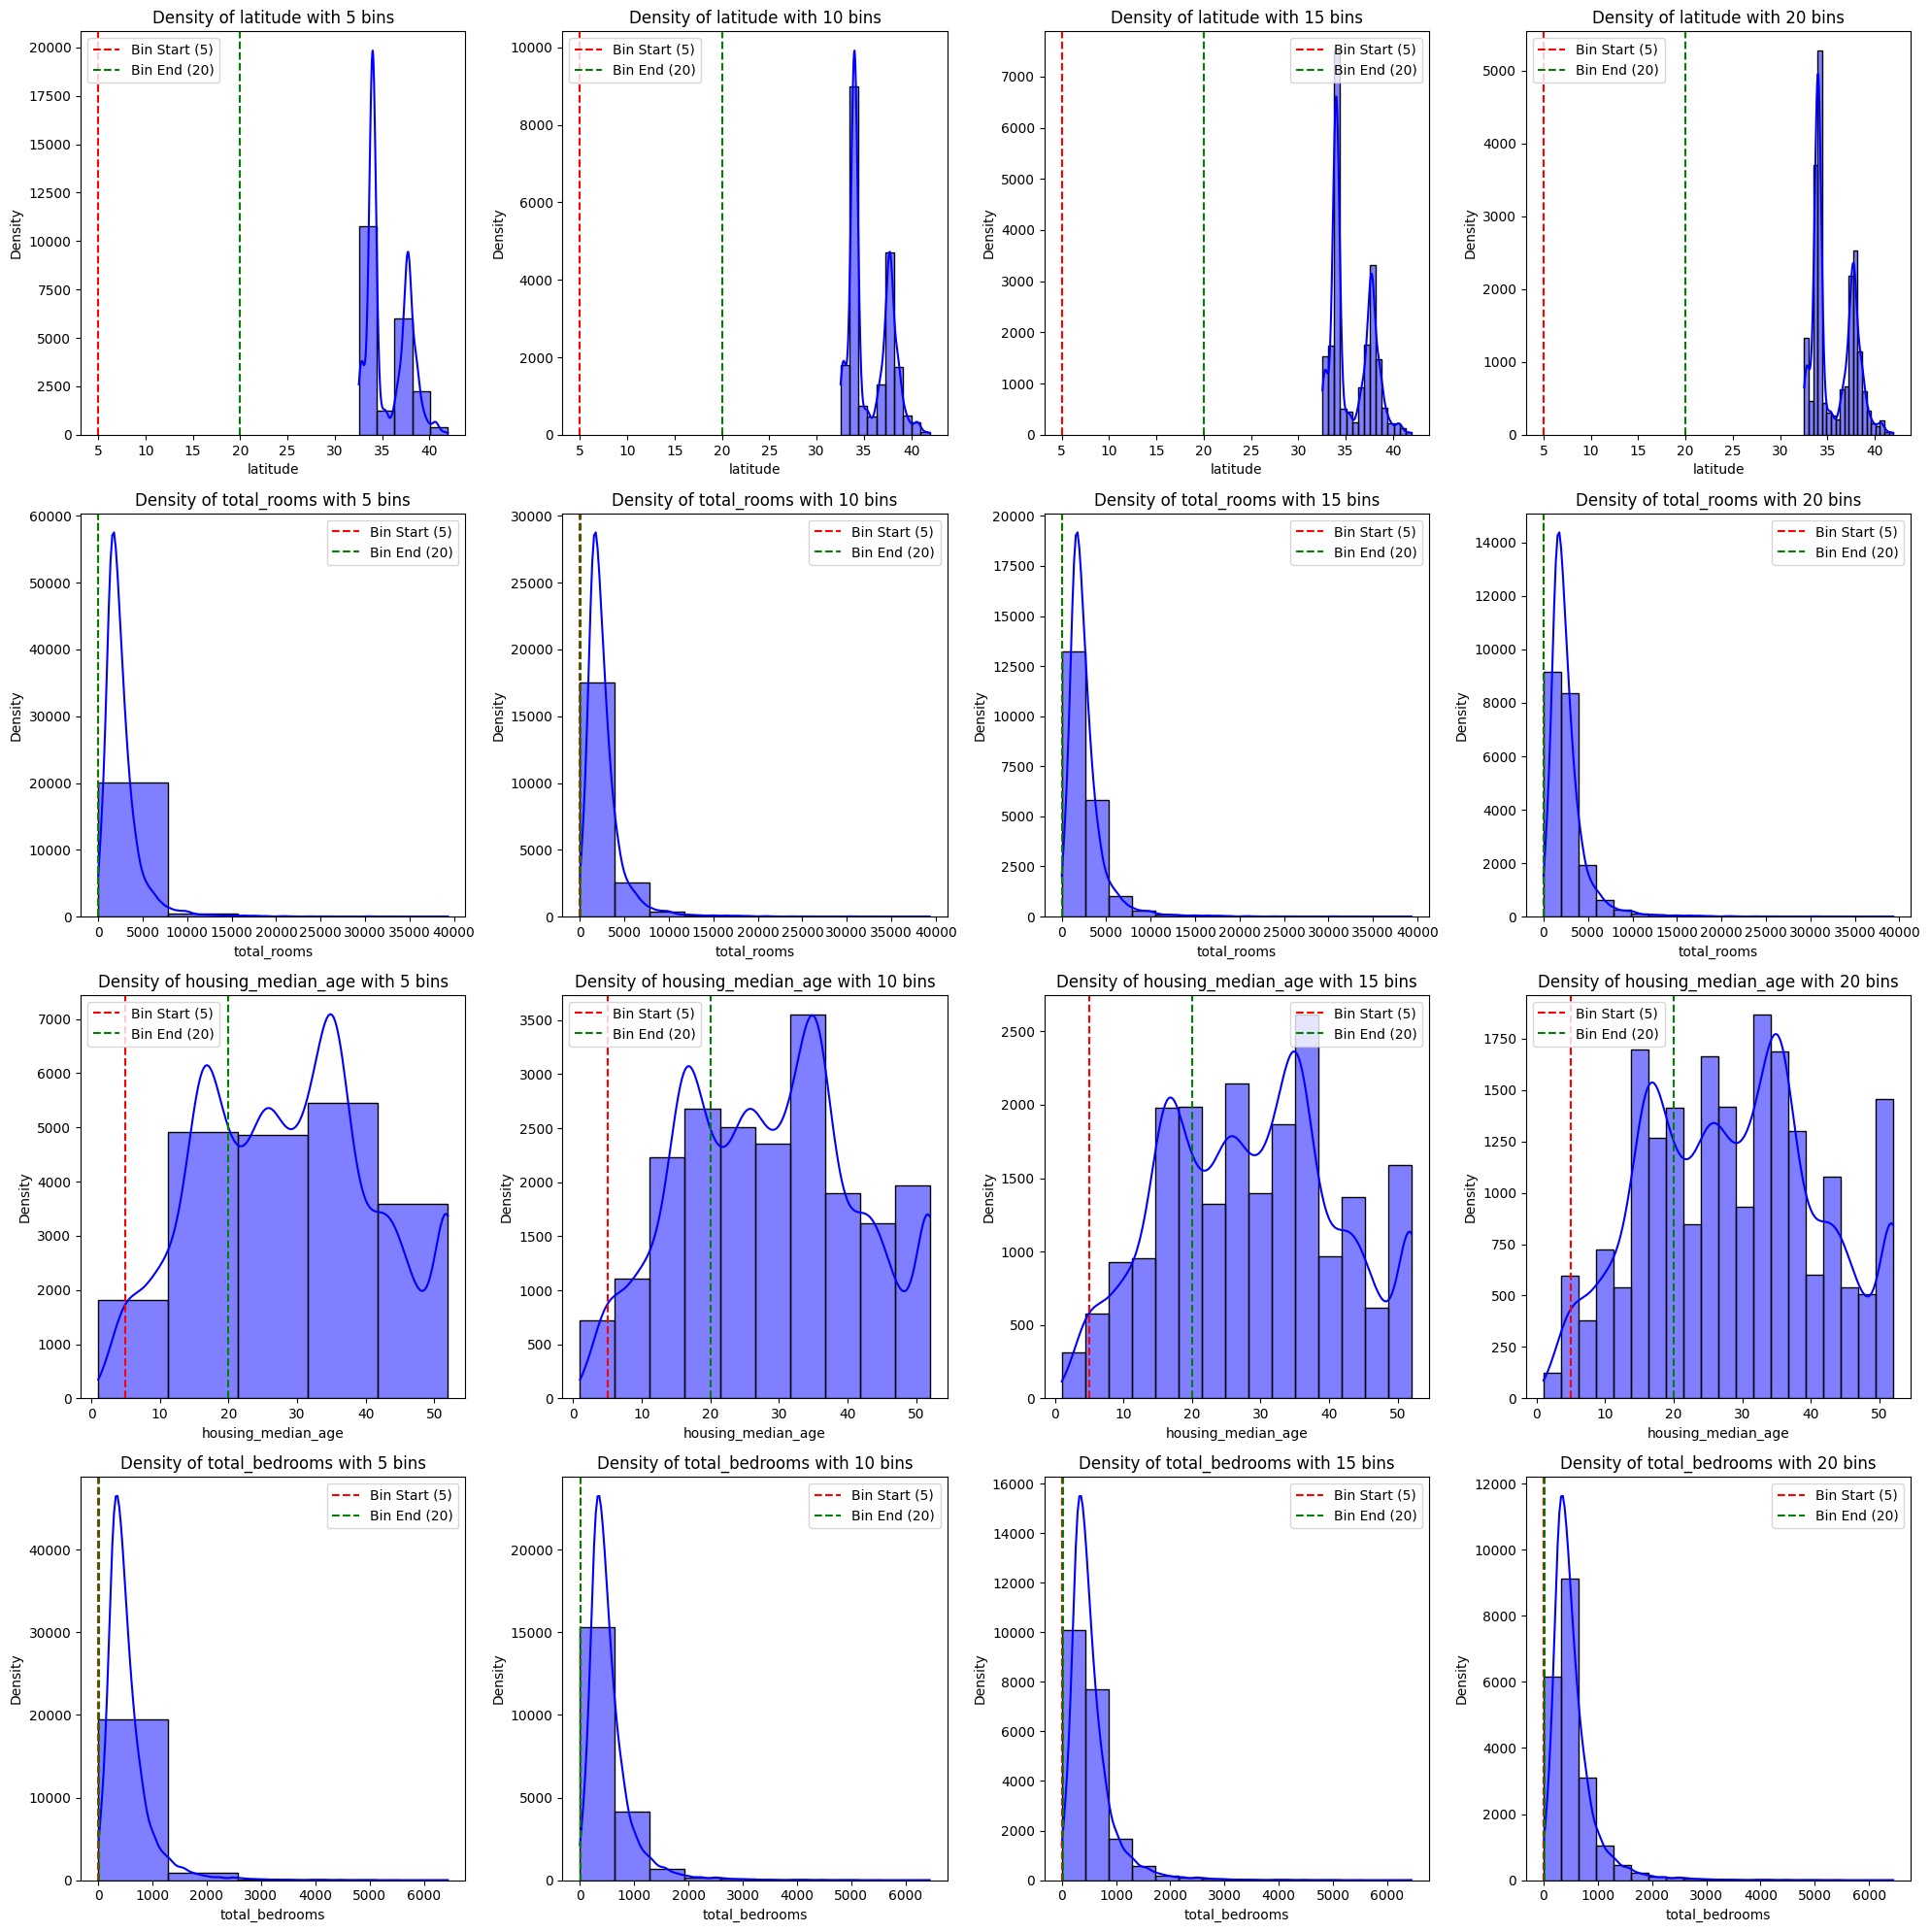

In [ ]:
"assignment 3, question 3"
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

file_path = '/content/drive/MyDrive/housing.csv'
housing_data = pd.read_csv(file_path)

columns_to_analyze = ['latitude', 'total_rooms', 'housing_median_age', 'total_bedrooms']
bin_edges = [5, 10, 15, 20]

plt.figure(figsize=(20, 20))

for i, column in enumerate(columns_to_analyze):
    for j, bin_count in enumerate(bin_edges):
        plt.subplot(4, 4, i * 4 + j + 1)
        sns.histplot(housing_data[column].dropna(), bins=bin_count, kde=True, color='blue')
        plt.title(f'Density of {column} with {bin_count} bins')
        plt.xlabel(column)
        plt.ylabel('Density')
        plt.axvline(bin_edges[0], color='red', linestyle='--', label=f'Bin Start ({bin_edges[0]})')
        plt.axvline(bin_edges[-1], color='green', linestyle='--', label=f'Bin End ({bin_edges[-1]})')
        plt.legend()

plt.tight_layout()
plt.show()


Colab notebooks allow you to combine **executable code** and **rich text** in a single document, along with **images**, **HTML**, **LaTeX** and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To learn more, see [Overview of Colab](/notebooks/basic_features_overview.ipynb). To create a new Colab notebook you can use the File menu above, or use the following link: [create a new Colab notebook](http://colab.research.google.com#create=true).

Colab notebooks are Jupyter notebooks that are hosted by Colab. To learn more about the Jupyter project, see [jupyter.org](https://www.jupyter.org).

<div class="markdown-google-sans">

## Data science
</div>

With Colab you can harness the full power of popular Python libraries to analyze and visualize data. The code cell below uses **numpy** to generate some random data, and uses **matplotlib** to visualize it. To edit the code, just click the cell and start editing.

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from Github and many other sources. To learn more about importing data, and how Colab can be used for data science, see the links below under [Working with Data](#working-with-data).

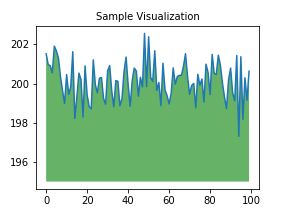

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including [GPUs and TPUs](#using-accelerated-hardware), regardless of the power of your machine. All you need is a browser.

For example, if you find yourself waiting for **pandas** code to finish running and want to go faster, you can switch to a GPU Runtime and use libraries like [RAPIDS cuDF](https://rapids.ai/cudf-pandas) that provide zero-code-change acceleration.

To learn more about accelerating pandas on Colab, see the [10 minute guide](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_colab_demo.ipynb) or
 [US stock market data analysis demo](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_stocks_demo.ipynb).

<div class="markdown-google-sans">

## Machine learning
</div>

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just [a few lines of code](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb).

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the [machine learning examples](#machine-learning-examples) below.

<div class="markdown-google-sans">

## More Resources

### Working with Notebooks in Colab

</div>

- [Overview of Colab](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Working with Data
</div>

- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Machine Learning Crash Course

<div>

These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Intro to RAPIDS cuDF to accelerate pandas](https://nvda.ws/rapids-cudf)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
</div>

- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.
